<a href="https://colab.research.google.com/github/MuhammadHassan667410/CodeAlpha_Tasks/blob/main/Disease_prediction_(heart)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data from UCI ML repo

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
import pandas as pd
x = pd.DataFrame(X)


In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [6]:
y = pd.DataFrame(y)

In [7]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


# Exploring and cleaning Data

In [8]:
import numpy as np

In [9]:
y.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [10]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.concat([x,y],axis=1)

In [14]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


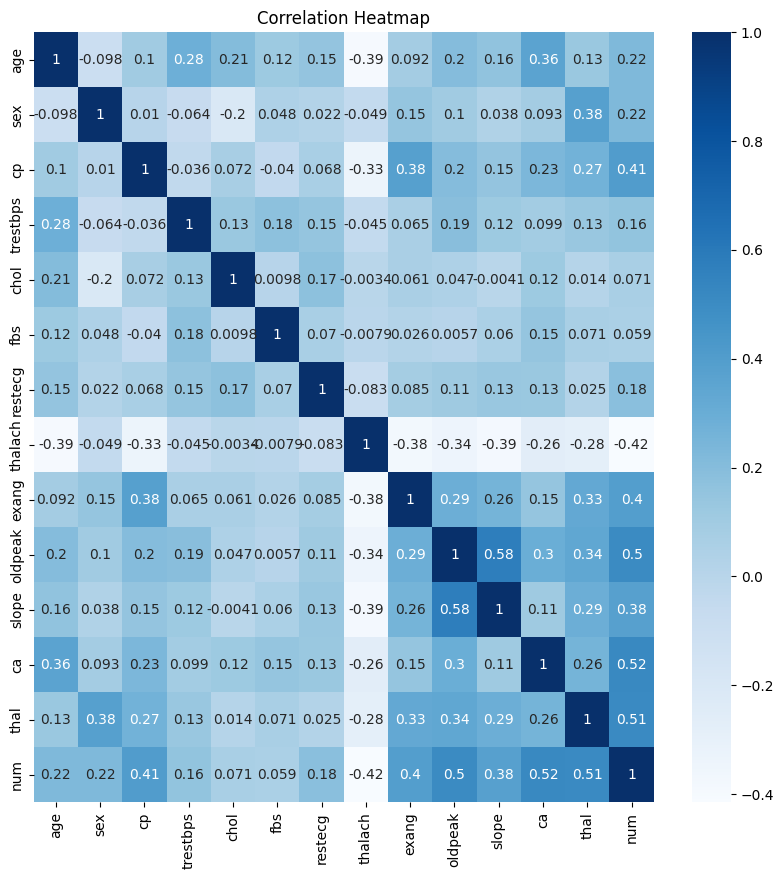

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [18]:
# fill missing values in a column with mean of that column
data['ca'].fillna(data['ca'].mean(), inplace=True)
data['thal'].fillna(data['thal'].mean(), inplace=True)


/tmp/ipython-input-3261870686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].mean(), inplace=True)
/tmp/ipython-input-3261870686.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [20]:
x = data.drop('num', axis=1)
y = data['num']

# Training, testing and evaluating models without SMOTE

In [21]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Random forest

In [22]:
# train, test and evaluate random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.4918032786885246
Precision: 0.3820692968233952
Recall: 0.4918032786885246
F1 score: 0.4278403611817305


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Multiclass Logistic Regression

In [23]:
# train, test and evaluate multi logistic reg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.5573770491803278
Precision: 0.49060629716367427
Recall: 0.5573770491803278
F1 score: 0.5183401639344262


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Naive Bayes

In [24]:
# train, test and evaluate multiclass naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.4918032786885246
Precision: 0.5199063231850117
Recall: 0.4918032786885246
F1 score: 0.4800526537023517


## SVM

In [25]:
# train, test and evaluate multiclass SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC(random_state=42)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.47540983606557374
Precision: 0.2260145122278957
Recall: 0.47540983606557374
F1 score: 0.3063752276867031


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tree

In [26]:
# train, test and evaluate multiclass Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.4918032786885246
Precision: 0.46889449348465745
Recall: 0.4918032786885246
F1 score: 0.4779610497865569


## KNN

In [27]:
# train, test and evaluate multiclass KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.4426229508196721
Precision: 0.26196052191368346
Recall: 0.4426229508196721
F1 score: 0.3291298865069357


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Training, testing and evaluating using SMOTE

In [28]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [29]:
# Train test split
from sklearn.model_selection import train_test_split
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
#

## Random Forest

In [30]:
# train, test and evaluate random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_res.fit(x_train_res, y_train_res)
y_pred_res = rf_res.predict(x_test_res)

accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res, average='weighted')
recall = recall_score(y_test_res, y_pred_res, average='weighted')
f1 = f1_score(y_test_res, y_pred_res, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8536585365853658
Precision: 0.8561397951641854
Recall: 0.8536585365853658
F1 score: 0.8528951918478461


## MultiClass Logistic Regression

In [31]:
# train, test and evaluate multi logistic reg

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_res = LogisticRegression(random_state=42)
lr_res.fit(x_train_res, y_train_res)
y_pred_res = lr_res.predict(x_test_res)

accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res, average='weighted')
recall = recall_score(y_test_res, y_pred_res, average='weighted')
f1 = f1_score(y_test_res, y_pred_res, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.49390243902439024
Precision: 0.49427882254810906
Recall: 0.49390243902439024
F1 score: 0.4902701862350655


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

In [32]:
# train, test and evaluate multiclass naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_res = GaussianNB()
nb_res.fit(x_train_res, y_train_res)
y_pred_res = nb_res.predict(x_test_res)

accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res, average='weighted')
recall = recall_score(y_test_res, y_pred_res, average='weighted')
f1 = f1_score(y_test_res, y_pred_res, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#


Accuracy: 0.47560975609756095
Precision: 0.4584726593233674
Recall: 0.47560975609756095
F1 score: 0.4553017586356594


## SVM

In [33]:
# train, test and evaluate multiclass SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_res = SVC(random_state=42)
svm_res.fit(x_train_res, y_train_res)
y_pred_res = svm_res.predict(x_test_res)

accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res, average='weighted')
recall = recall_score(y_test_res, y_pred_res, average='weighted')
f1 = f1_score(y_test_res, y_pred_res, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.3353658536585366
Precision: 0.37403575067078215
Recall: 0.3353658536585366
F1 score: 0.32069863774490753


## Decision Tree

In [34]:
# train, test and evaluate multiclass Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_res = DecisionTreeClassifier(random_state=42)
dt_res.fit(x_train_res, y_train_res)
y_pred_res = dt_res.predict(x_test_res)

accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res, average='weighted')
recall = recall_score(y_test_res, y_pred_res, average='weighted')
f1 = f1_score(y_test_res, y_pred_res, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#

Accuracy: 0.7317073170731707
Precision: 0.7464159135972627
Recall: 0.7317073170731707
F1 score: 0.7357878065601999


## KNN


In [35]:
# train, test and evaluate multiclass KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_res = KNeighborsClassifier(n_neighbors=5)
knn_res.fit(x_train_res, y_train_res)
y_pred_res = knn_res.predict(x_test_res)

accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res, average='weighted')
recall = recall_score(y_test_res, y_pred_res, average='weighted')
f1 = f1_score(y_test_res, y_pred_res, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
#


Accuracy: 0.6890243902439024
Precision: 0.6858859397417504
Recall: 0.6890243902439024
F1 score: 0.6786185266944688


# Comparing Models

In [51]:
random_forest_acc = {
    'Accuracy': 0.4918032786885246,
    'Precision': 0.3820692968233952,
    'Recall': 0.4918032786885246,
    'F1 score': 0.4278403611817305
}

In [59]:
logistic_regression_acc = {
    'Accuracy': 0.5573770491803278,
    'Precision': 0.49060629716367427,
    'Recall': 0.5573770491803278,
    'F1 score': 0.5183401639344262
}

In [54]:
Navive_bayes_acc = {
    'Accuracy': 0.4918032786885246,
    'Precision': 0.5199063231850117,
    'Recall': 0.4918032786885246,
    'F1 score': 0.4800526537023517
}

In [65]:
SVM_acc = {
    'Accuracy': 0.47540983606557374,
    'Precision': 0.2260145122278957,
    'Recall': 0.47540983606557374,
    'F1 score': 0.3063752276867031
}

In [63]:
Decision_tree_acc = {
    'Accuracy': 0.4918032786885246,
    'Precision': 0.46889449348465745,
    'Recall': 0.4918032786885246,
    '1 score': 0.4779610497865569
}

In [57]:
KNN_acc = {
    'Accuracy': 0.4426229508196721,
    'Precision': 0.26196052191368346,
    'Recall': 0.4426229508196721,
    'F1 score': 0.3291298865069357
}

In [58]:
random_forest_acc_res = {
    'Accuracy': 0.8536585365853658,
    'Precision': 0.8561397951641854,
    'Recall': 0.8536585365853658,
    'F1 score': 0.8528951918478461
}

In [60]:
logistic_regression_acc_res = {
    'Accuracy': 0.49390243902439024,
    'Precision': 0.49427882254810906,
    'Recall': 0.49390243902439024,
    'F1 score': 0.4902701862350655
}

In [61]:
Navive_bayes_acc_res = {
    'Accuracy': 0.47560975609756095,
    'Precision': 0.4584726593233674,
    'Recall': 0.47560975609756095,
    'F1 score': 0.4553017586356594
}

In [64]:
SVM_acc_res = {
    'Accuracy': 0.3353658536585366,
    'Precision': 0.37403575067078215,
    'Recall': 0.3353658536585366,
    'F1 score': 0.32069863774490753
}

In [66]:
Decision_tree_acc_res = {
    'Accuracy': 0.7317073170731707,
    'Precision': 0.7464159135972627,
    'Recall': 0.7317073170731707,
    'F1 score': 0.7357878065601999
}

In [67]:
KNN_acc_res = {
    'Accuracy': 0.6890243902439024,
    'Precision': 0.6858859397417504,
    'Recall': 0.6890243902439024,
    'F1 score': 0.6786185266944688
}

In [68]:
# Compare accuracy of all models
import pandas as pd
models = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN']
accuracies = [random_forest_acc['Accuracy'], logistic_regression_acc['Accuracy'], Navive_bayes_acc['Accuracy'], SVM_acc['Accuracy'], Decision_tree_acc['Accuracy'], KNN_acc['Accuracy']]
accuracies_res = [random_forest_acc_res['Accuracy'], logistic_regression_acc_res['Accuracy'], Navive_bayes_acc_res['Accuracy'], SVM_acc_res['Accuracy'], Decision_tree_acc_res['Accuracy'], KNN_acc_res['Accuracy']]
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Accuracy with SMOTE': accuracies_res})
df

,Model,Accuracy,Accuracy with SMOTE
0,Random Forest,0.491803,0.853659
1,Logistic Regression,0.557377,0.493902
2,Naive Bayes,0.491803,0.475610
3,SVM,0.475410,0.335366
4,Decision Tree,0.491803,0.731707
5,KNN,0.442623,0.689024


# Graphical Comparison

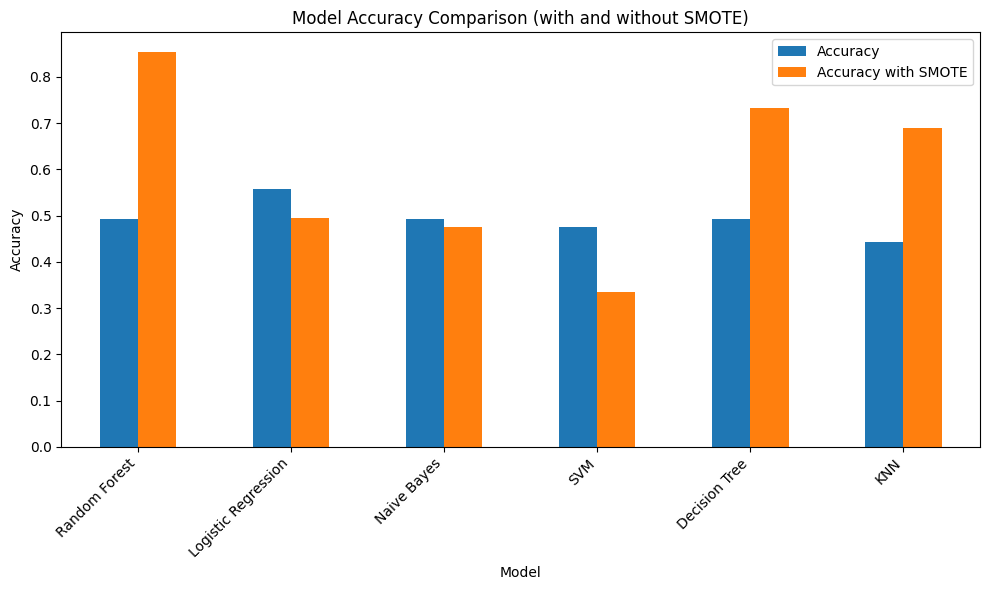

In [69]:
import matplotlib.pyplot as plt

# Plot the accuracy of models with and without SMOTE
df.plot(x='Model', y=['Accuracy', 'Accuracy with SMOTE'], kind='bar', figsize=(10, 6))
plt.title('Model Accuracy Comparison (with and without SMOTE)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

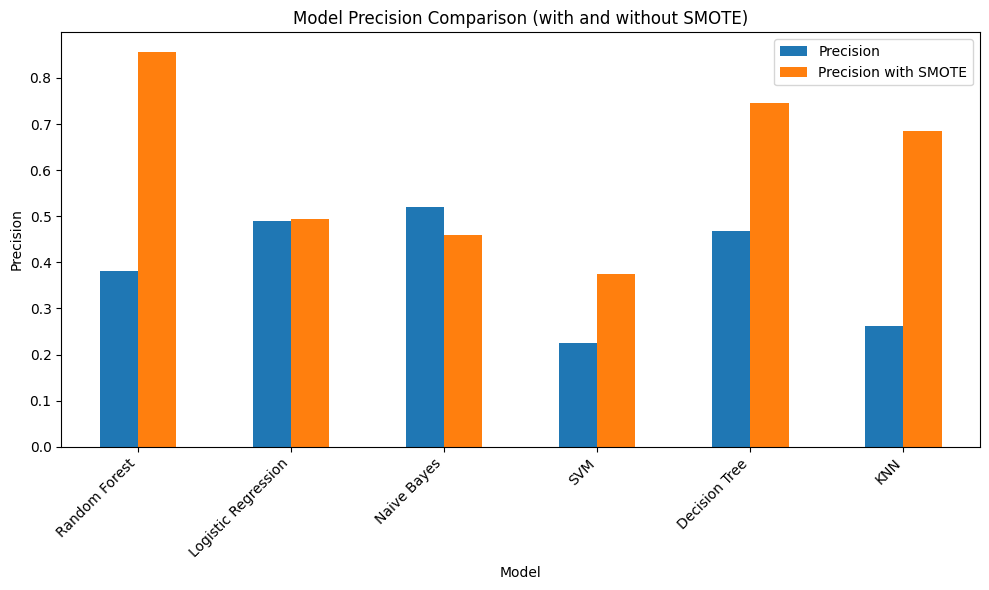

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for precision values
models = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN']
precision_scores = [random_forest_acc['Precision'], logistic_regression_acc['Precision'], Navive_bayes_acc['Precision'], SVM_acc['Precision'], Decision_tree_acc['Precision'], KNN_acc['Precision']]
precision_scores_res = [random_forest_acc_res['Precision'], logistic_regression_acc_res['Precision'], Navive_bayes_acc_res['Precision'], SVM_acc_res['Precision'], Decision_tree_acc_res['Precision'], KNN_acc_res['Precision']]
df_precision = pd.DataFrame({'Model': models, 'Precision': precision_scores, 'Precision with SMOTE': precision_scores_res})

# Plot the precision of models with and without SMOTE
df_precision.plot(x='Model', y=['Precision', 'Precision with SMOTE'], kind='bar', figsize=(10, 6))
plt.title('Model Precision Comparison (with and without SMOTE)')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

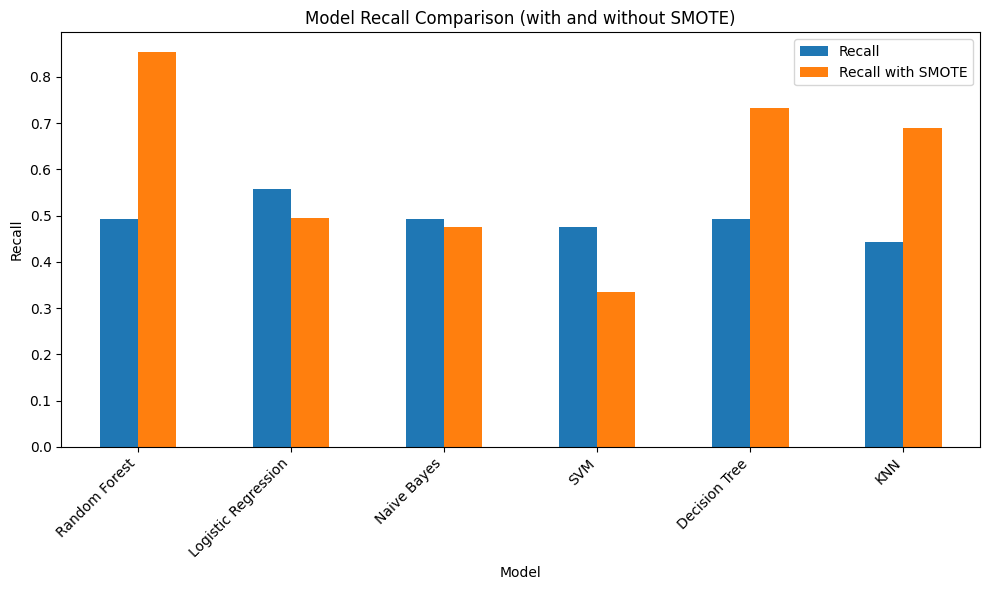

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for recall values
models = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN']
recall_scores = [random_forest_acc['Recall'], logistic_regression_acc['Recall'], Navive_bayes_acc['Recall'], SVM_acc['Recall'], Decision_tree_acc['Recall'], KNN_acc['Recall']]
recall_scores_res = [random_forest_acc_res['Recall'], logistic_regression_acc_res['Recall'], Navive_bayes_acc_res['Recall'], SVM_acc_res['Recall'], Decision_tree_acc_res['Recall'], KNN_acc_res['Recall']]
df_recall = pd.DataFrame({'Model': models, 'Recall': recall_scores, 'Recall with SMOTE': recall_scores_res})

# Plot the recall of models with and without SMOTE
df_recall.plot(x='Model', y=['Recall', 'Recall with SMOTE'], kind='bar', figsize=(10, 6))
plt.title('Model Recall Comparison (with and without SMOTE)')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

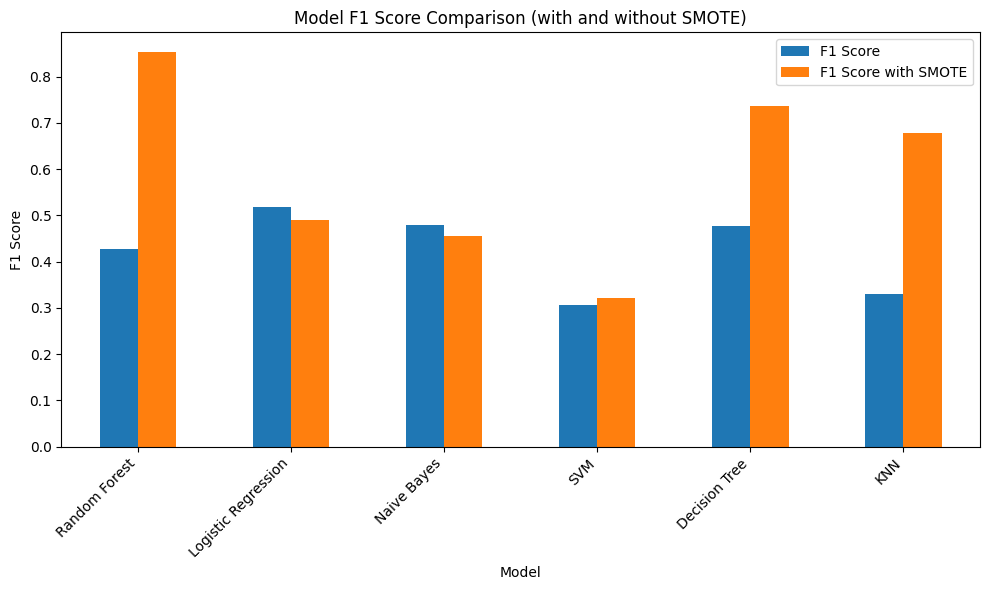

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for F1 scores
models = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN']
f1_scores = [random_forest_acc['F1 score'] if 'F1 score' in random_forest_acc else None,
             logistic_regression_acc['F1 score'] if 'F1 score' in logistic_regression_acc else None,
             Navive_bayes_acc['F1 score'] if 'F1 score' in Navive_bayes_acc else None,
             SVM_acc['F1 score'] if 'F1 score' in SVM_acc else None,
             Decision_tree_acc.get('F1 score', Decision_tree_acc.get('1 score')), # Use .get with a fallback for the typo
             KNN_acc['F1 score'] if 'F1 score' in KNN_acc else None]

f1_scores_res = [random_forest_acc_res['F1 score'] if 'F1 score' in random_forest_acc_res else None,
                 logistic_regression_acc_res['F1 score'] if 'F1 score' in logistic_regression_acc_res else None,
                 Navive_bayes_acc_res['F1 score'] if 'F1 score' in Navive_bayes_acc_res else None,
                 SVM_acc_res['F1 score'] if 'F1 score' in SVM_acc_res else None,
                 Decision_tree_acc_res['F1 score'] if 'F1 score' in Decision_tree_acc_res else None,
                 KNN_acc_res['F1 score'] if 'F1 score' in KNN_acc_res else None]


df_f1 = pd.DataFrame({'Model': models, 'F1 Score': f1_scores, 'F1 Score with SMOTE': f1_scores_res})

# Plot the F1 scores of models with and without SMOTE
df_f1.plot(x='Model', y=['F1 Score', 'F1 Score with SMOTE'], kind='bar', figsize=(10, 6))
plt.title('Model F1 Score Comparison (with and without SMOTE)')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()